NeuralProphet is a python library for modeling time-series data based on neural networks. It’s built on top of PyTorch and is heavily inspired by Facebook Prophet and AR-Net libraries.

According to NeuralProphet’s documentation, the added features are:

Using PyTorch’s Gradient Descent optimization engine making the modeling process much faster than Prophet Using AR-Net for modeling time-series autocorrelation (aka serial correlation) Custom losses and metrics Having configurable non-linear layers of feed-forward neural networks

In [1]:
from neuralprophet import NeuralProphet
import pandas as pd

In [2]:
# Plotting imports
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot


In [3]:
final_store_cat_df = pd.read_csv('final_store_cat_df.csv', index_col = 'date')

In [4]:
Cat_CA_1_FOODS = final_store_cat_df[['CA_1_FOODS']].copy()

In [5]:
Cat_CA_1_FOODS = Cat_CA_1_FOODS.reset_index()

In [6]:
df_final = Cat_CA_1_FOODS[['date', 'CA_1_FOODS']].rename({'date': 'ds', 'CA_1_FOODS':'y'},axis='columns')

In [7]:
model = NeuralProphet()

In [8]:
metrics = model.fit(df_final)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.948% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 160


  0%|          | 0/132 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.49E-02, min: 1.02E+00


  0%|          | 0/132 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.11E-01, min: 1.19E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.02E-01
Epoch[160/160]: 100%|██████████| 160/160 [00:36<00:00,  4.44it/s, SmoothL1Loss=0.00369, MAE=258, RMSE=340, RegLoss=0]   


In [9]:
future = model.make_future_dataframe(df_final, periods=28, n_historic_predictions=len(df_final))


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.948% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - /home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/neuralprophet/forecaster.py:2060: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




In [10]:
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.948% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.948% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - /home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/neuralprophet/forecaster.py:1406: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




Text(0.5, 1.0, 'sales')

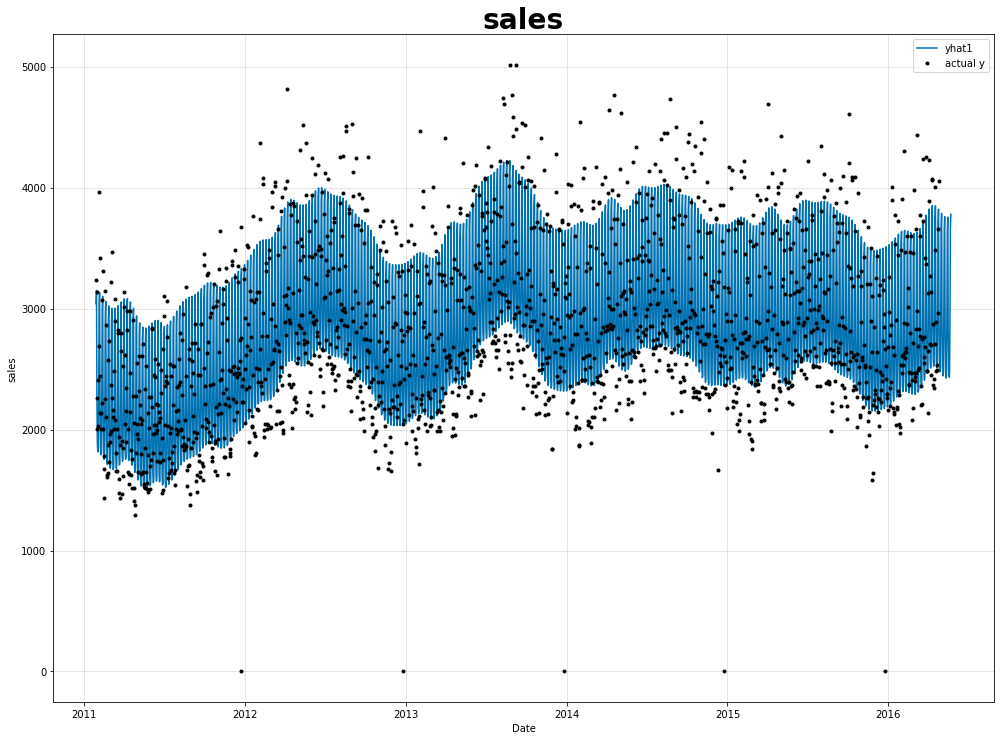

In [11]:
fig, ax = plt.subplots(figsize=(14, 10))
model.plot(forecast, xlabel="Date", ylabel="sales", ax=ax)
ax.set_title("sales", fontsize=28, fontweight="bold")

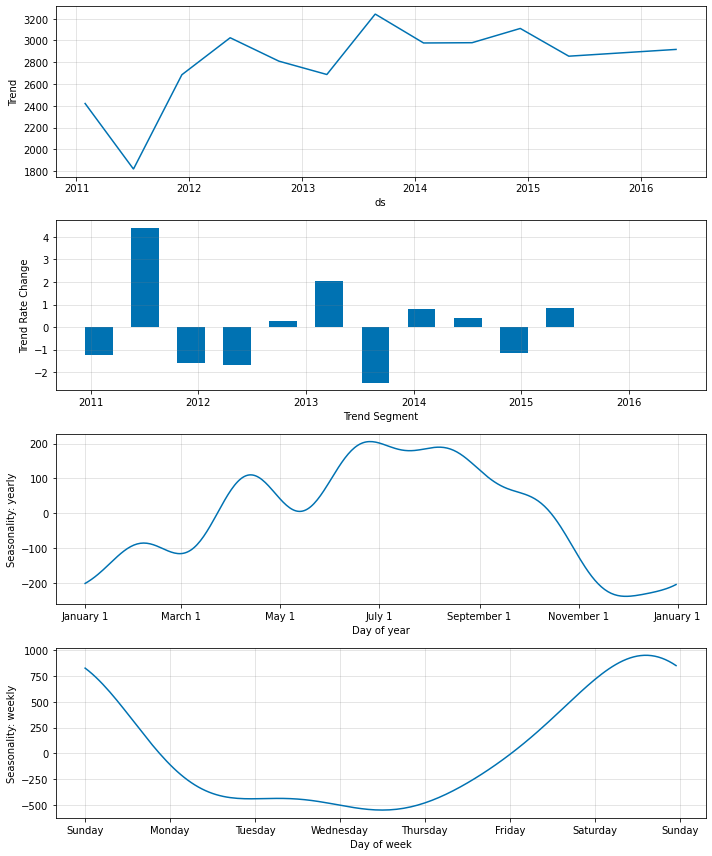

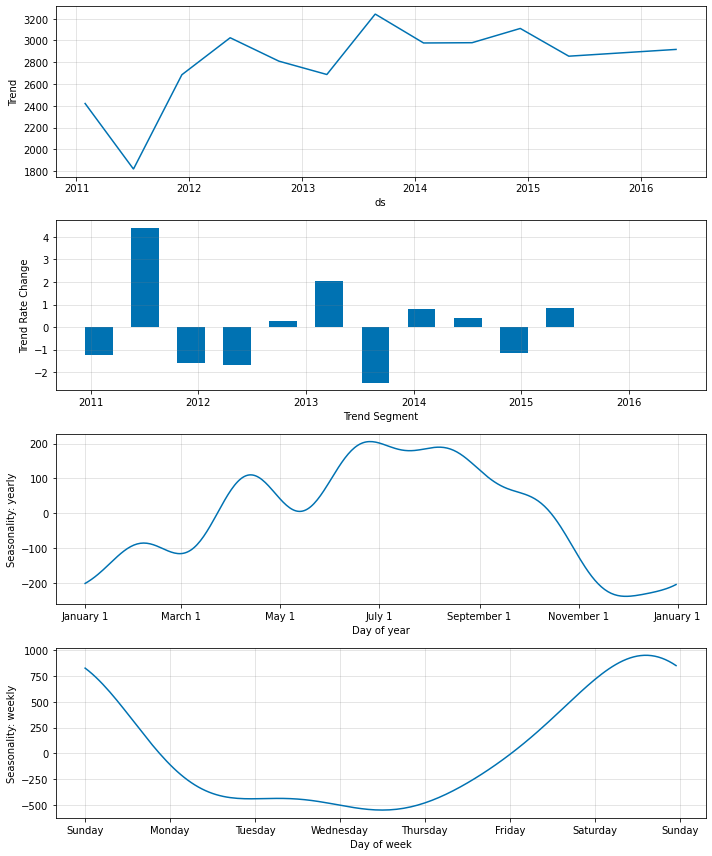

In [12]:
model.plot_parameters()

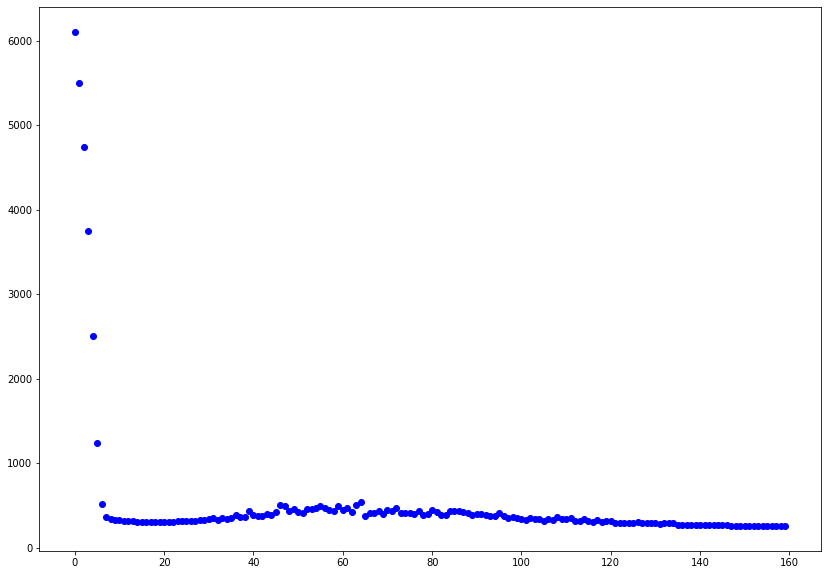

In [13]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metrics["MAE"], 'ob', linewidth=6, label="Training Loss")  
#ax.plot(metrics["MAE_val"], '-r', linewidth=2, label="Validation Loss")

In [14]:
forecast.tail(50)

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
1891,2016-04-03,4226.0,3823.394531,-402.605469,2914.231689,81.701561,827.461365
1892,2016-04-04,3273.0,2892.199219,-380.800781,2914.410889,87.152115,-109.363838
1893,2016-04-05,2711.0,2566.461182,-144.538818,2914.589844,92.078331,-440.207123
1894,2016-04-06,2698.0,2508.687988,-189.312012,2914.769043,96.452499,-502.533691
1895,2016-04-07,2450.0,2534.905029,84.905029,2914.948242,100.251175,-480.294281
1896,2016-04-08,3141.0,3007.859131,-133.140869,2915.127441,103.455551,-10.723742
1897,2016-04-09,4073.0,3737.019531,-335.980469,2915.306641,106.051559,715.661316
1898,2016-04-10,4061.0,3850.977051,-210.022949,2915.485596,108.030014,827.461365
1899,2016-04-11,2876.0,2915.687988,39.687988,2915.665039,109.386803,-109.363838
1900,2016-04-12,2372.0,2585.759521,213.759521,2915.843994,110.122841,-440.207123


In [15]:
mask = (forecast['ds'] > '2016-04-24') & (forecast['ds'] <= '2016-05-22')

In [16]:
yhat_predicted = forecast.loc[mask]

In [17]:
yhat_predicted = yhat_predicted[['ds','yhat1']]

In [18]:
yhat_predicted

,ds,yhat1
1913,2016-04-25,2881.180420
1914,2016-04-26,2545.254150
1915,2016-04-27,2477.752441
1916,2016-04-28,2494.779541
1917,2016-04-29,2959.156738
1918,2016-04-30,3680.423096
1919,2016-05-01,3787.233398
1920,2016-05-02,2845.600586
1921,2016-05-03,2510.184326
1922,2016-05-04,2443.568604


In [19]:
yhat_Np_CA_1_FOODS = yhat_predicted.to_csv('yhat_Np_CA_1_FOODS.csv')

In [18]:
CA_1_HOBBIES = final_store_cat_df[['CA_1_HOBBIES']].copy()

In [20]:
CA_1_HOBBIES = CA_1_HOBBIES.reset_index()

In [21]:
df_final = CA_1_HOBBIES[['date', 'CA_1_HOBBIES']].rename({'date': 'ds', 'CA_1_HOBBIES':'y'},axis='columns')

In [22]:
model = NeuralProphet()

In [23]:
metrics = model.fit(df_final)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.948% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 160


  0%|          | 0/132 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.91E-02, min: 5.41E-01


  0%|          | 0/132 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.10E-02, min: 6.33E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.24E-02
Epoch[160/160]: 100%|██████████| 160/160 [00:18<00:00,  8.79it/s, SmoothL1Loss=0.00835, MAE=65.5, RMSE=85.1, RegLoss=0]


In [24]:
future = model.make_future_dataframe(df_final, periods=28, n_historic_predictions=len(df_final))

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.948% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - /home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/neuralprophet/forecaster.py:2060: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




In [25]:
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.948% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.948% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - /home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/neuralprophet/forecaster.py:1406: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




In [27]:
forecast.tail(50)

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
1891,2016-04-03,790.0,589.791077,-200.208923,539.534607,-2.750843,53.007263
1892,2016-04-04,463.0,513.541199,50.541199,539.502014,-1.891971,-24.068840
1893,2016-04-05,545.0,490.294861,-54.705139,539.469421,-1.128240,-48.046352
1894,2016-04-06,427.0,486.454163,59.454163,539.436890,-0.468111,-52.514591
1895,2016-04-07,394.0,485.022308,91.022308,539.404297,0.081080,-54.463020
1896,2016-04-08,582.0,553.033020,-28.966980,539.371704,0.513215,13.148116
1897,2016-04-09,571.0,653.100037,82.100037,539.339172,0.823449,112.937424
1898,2016-04-10,547.0,593.322083,46.322083,539.306580,1.008273,53.007263
1899,2016-04-11,620.0,516.270691,-103.729309,539.273987,1.065550,-24.068840
1900,2016-04-12,391.0,492.189636,101.189636,539.241394,0.994542,-48.046352


Text(0.5, 1.0, 'sales')

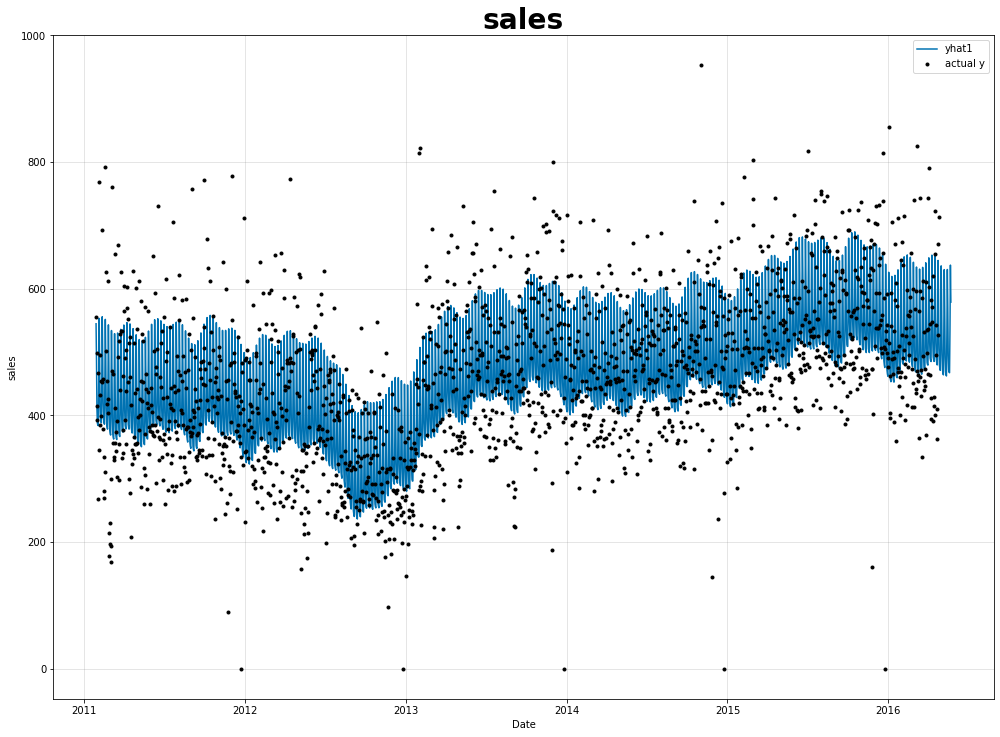

In [28]:
fig, ax = plt.subplots(figsize=(14, 10))
model.plot(forecast, xlabel="Date", ylabel="sales", ax=ax)
ax.set_title("sales", fontsize=28, fontweight="bold")

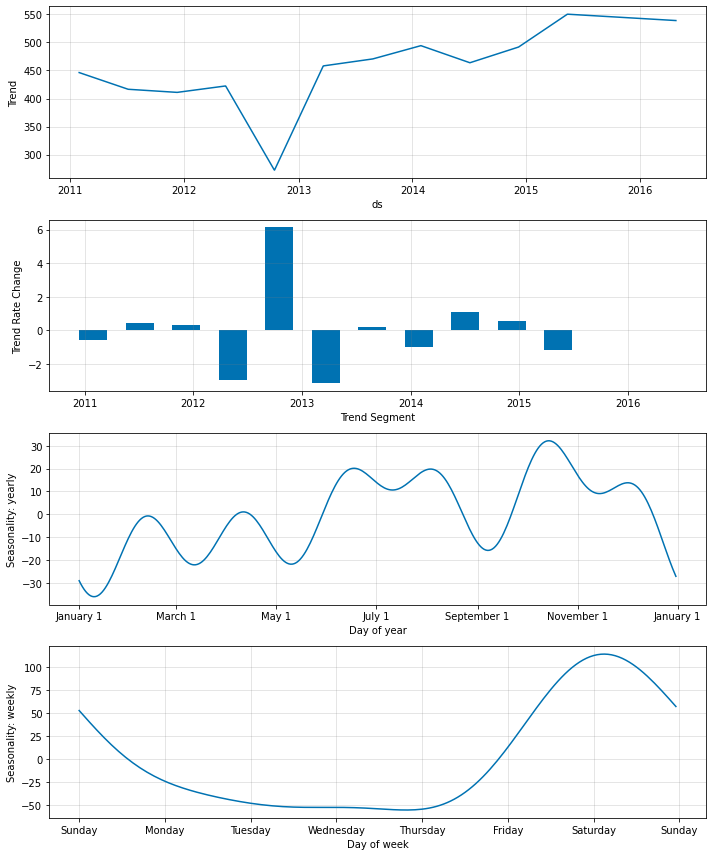

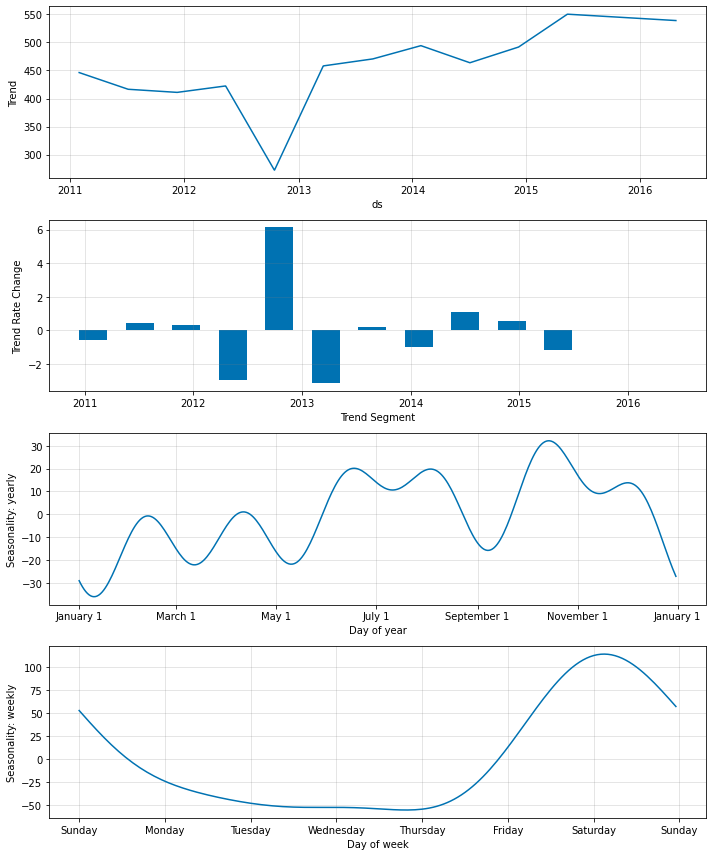

In [29]:
model.plot_parameters()

In [30]:
metrics

,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.294063,426.398952,541.196389,0.0
1,0.234327,373.778697,474.829570,0.0
2,0.171419,313.734073,397.434762,0.0
3,0.106206,244.902851,306.605271,0.0
4,0.052605,173.246024,214.240747,0.0
...,...,...,...,...
155,0.008386,65.609858,85.503734,0.0
156,0.008371,65.570875,85.169909,0.0
157,0.008360,65.512332,85.358175,0.0
158,0.008354,65.494726,85.227291,0.0


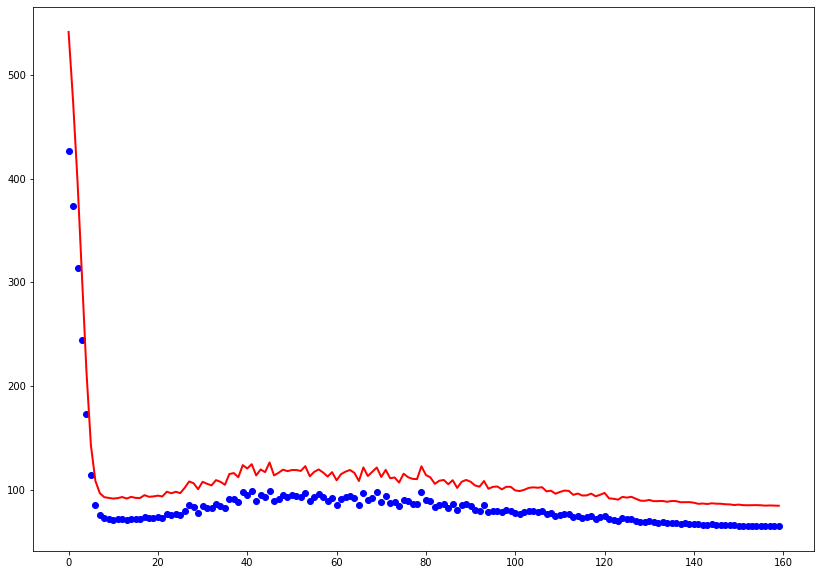

In [33]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metrics["MAE"], 'ob', linewidth=6, label="Training Loss")  
ax.plot(metrics["RMSE"], '-r', linewidth=2, label="RMSE")

In [34]:
CA_1_HOUSEHOLD = final_store_cat_df[['CA_1_HOUSEHOLD']].copy()

In [35]:
CA_1_HOUSEHOLD = CA_1_HOUSEHOLD.reset_index()

In [38]:
df_final = CA_1_HOUSEHOLD[['date', 'CA_1_HOUSEHOLD']].rename({'date': 'ds', 'CA_1_HOUSEHOLD':'y'},axis='columns')

In [39]:
model = NeuralProphet()

In [40]:
metrics = model.fit(df_final)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.948% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 160


  0%|          | 0/132 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.49E-02, min: 2.09E-01


  0%|          | 0/132 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.49E-02, min: 2.09E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.65E-02
Epoch[160/160]: 100%|██████████| 160/160 [00:17<00:00,  9.03it/s, SmoothL1Loss=0.00292, MAE=69.7, RMSE=93.7, RegLoss=0]


In [41]:
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.948% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.948% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - /home/studio-lab-user/.conda/envs/d2l/lib/python3.9/site-packages/neuralprophet/forecaster.py:1406: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




In [44]:
forecast.tail(50)

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
1891,2016-04-03,790.0,1294.209961,504.209961,1026.521118,-4.013087,271.701874
1892,2016-04-04,463.0,1000.161926,537.161926,1026.687378,-3.286058,-23.239376
1893,2016-04-05,545.0,893.144409,348.144409,1026.853638,-2.623505,-131.085648
1894,2016-04-06,427.0,866.450500,439.450500,1027.019775,-2.030538,-158.538681
1895,2016-04-07,394.0,874.086731,480.086731,1027.186035,-1.511649,-151.587677
1896,2016-04-08,582.0,995.768860,413.768860,1027.352173,-1.070672,-30.512663
1897,2016-04-09,571.0,1250.069824,679.069824,1027.518433,-0.710717,223.262146
1898,2016-04-10,547.0,1298.952515,751.952515,1027.684692,-0.434142,271.701874
1899,2016-04-11,620.0,1004.369019,384.369019,1027.850830,-0.242487,-23.239376
1900,2016-04-12,391.0,896.794983,505.794983,1028.017090,-0.136482,-131.085648


Text(0.5, 1.0, 'sales')

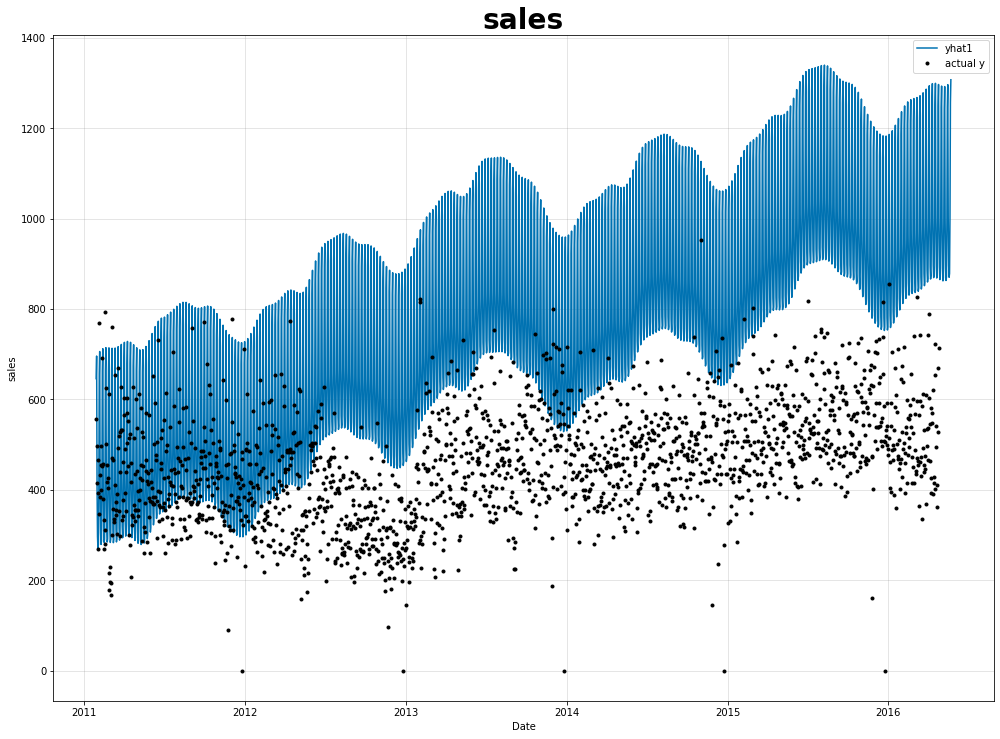

In [45]:
fig, ax = plt.subplots(figsize=(14, 10))
model.plot(forecast, xlabel="Date", ylabel="sales", ax=ax)
ax.set_title("sales", fontsize=28, fontweight="bold")

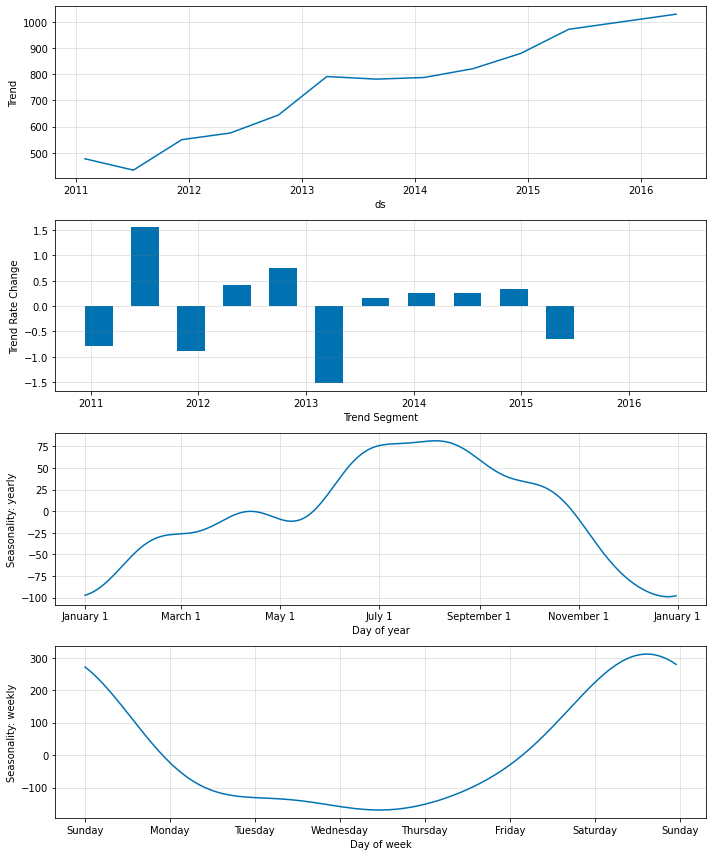

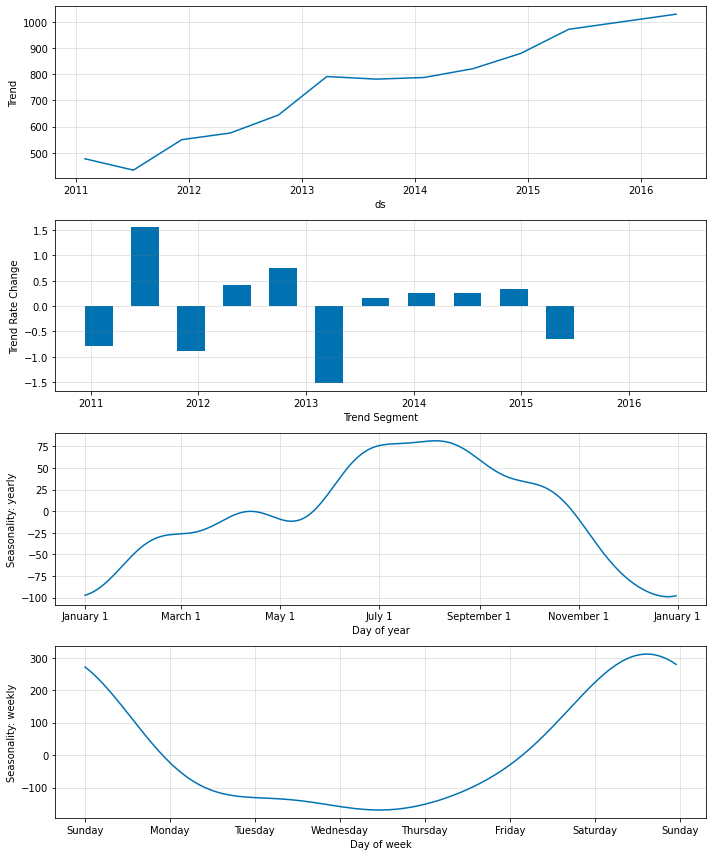

In [46]:
model.plot_parameters()

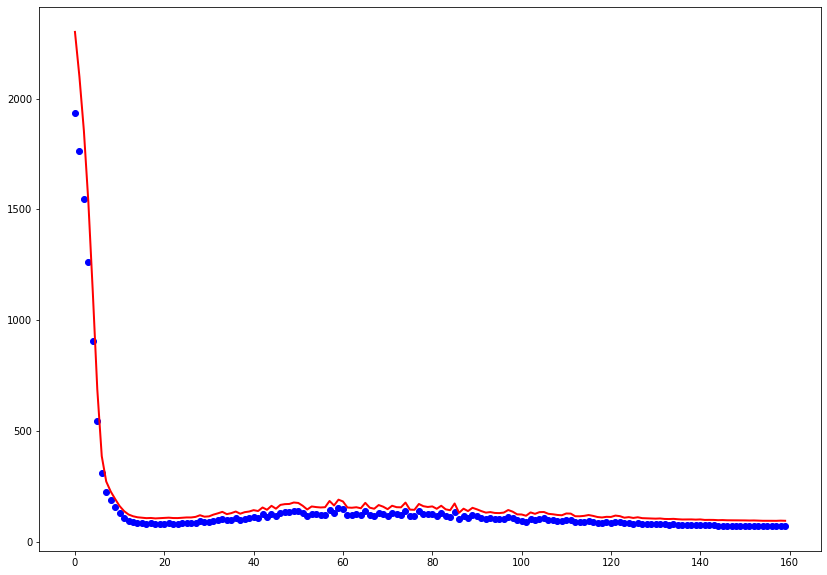

In [47]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(metrics["MAE"], 'ob', linewidth=6, label="Training Loss")  
ax.plot(metrics["RMSE"], '-r', linewidth=2, label="RMSE")

In [48]:
metrics

,SmoothL1Loss,MAE,RMSE,RegLoss
0,1.097881,1935.458629,2301.255418,0.0
1,0.966564,1762.135743,2098.947409,0.0
2,0.803539,1545.104865,1854.706033,0.0
3,0.597071,1261.259539,1532.527621,0.0
4,0.357829,907.526289,1123.687181,0.0
...,...,...,...,...
155,0.002943,70.097329,93.899933,0.0
156,0.002935,69.822354,93.631131,0.0
157,0.002930,69.776315,93.472821,0.0
158,0.002926,69.722165,94.309387,0.0
